In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
data=pd.read_csv('/content/User_Data.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [10]:
new_gender=data['Gender'].map({'Male':1,'Female':2})

In [11]:
new_gender

0      1
1      1
2      2
3      2
4      1
      ..
395    2
396    1
397    2
398    1
399    2
Name: Gender, Length: 400, dtype: int64

In [12]:
data["Gender"]=new_gender

In [13]:
x=data.iloc[:,1:4]
y=data.iloc[:,4]

In [14]:
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,2,26,43000
3,2,27,57000
4,1,19,76000
...,...,...,...
395,2,46,41000
396,1,51,23000
397,2,50,20000
398,1,36,33000


In [15]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100,
                                  max_depth=3,
                                  max_features='auto',
                                  min_samples_leaf=4,
                                  bootstrap=True,
                                  n_jobs=-1,random_state=0)
classifier.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=3, min_samples_leaf=4, n_jobs=-1,
                       random_state=0)

In [22]:
ypred=classifier.predict(xtest)

In [23]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,ypred)
cm

array([[64,  4],
       [ 3, 29]])

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.93

In [26]:
from sklearn.tree import plot_tree

In [27]:
classifier.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_leaf=4,
                        random_state=209652396),
 DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_leaf=4,
                        random_state=398764591),
 DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_leaf=4,
                        random_state=924231285),
 DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_leaf=4,
                        random_state=1478610112),
 DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_leaf=4,
                        random_state=441365315),
 DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_leaf=4,
                        random_state=1537364731),
 DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_leaf=4,
                        random_state=192771779),
 DecisionTreeClassifier(max_depth=3, max_features='auto', min_samples_leaf=4,
                        random_

In [28]:
from sklearn import tree

In [29]:
Random_forest = tree.export_graphviz(classifier.estimators_[99],out_file='tree.dot', 
                            feature_names=xtrain.columns,max_depth=2, 
                           filled=True, impurity=True, 
                           rounded=True)


In [30]:
!dot -Tpng tree.dot -o tree.png

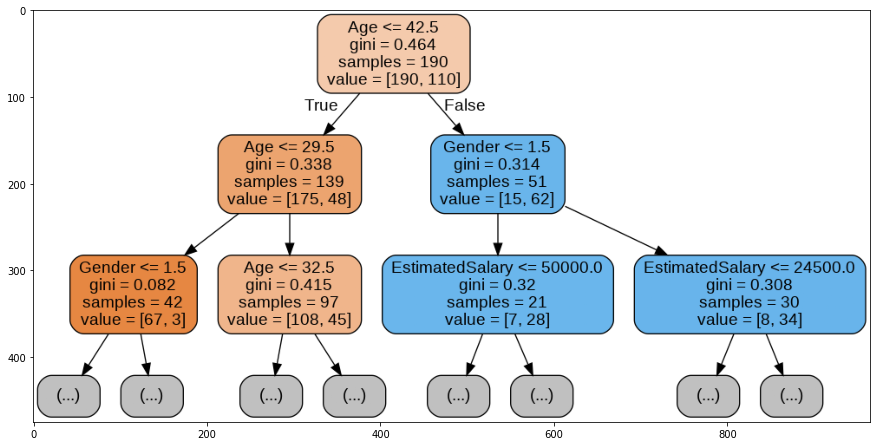

In [31]:
image=plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)